* Import files



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

*Import Data file

In [ ]:
coloumn_names=["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak","slope","ca","thal","num"]
#cleavland dataset
df_cleavland=pd.read_csv("processed.cleveland.data",names=coloumn_names)

* Pre Processing

In [ ]:
# Converting data type string to numeric
df_cleavland['ca'] = pd.to_numeric(df_cleavland['ca'], errors='coerce')
df_cleavland['thal'] = pd.to_numeric(df_cleavland['thal'], errors='coerce')

# repalcing ? with NA
df_cleavland.replace('?',np.nan, inplace=True)

df_cleavland = df_cleavland.dropna()
#Converting taget coloumn values to 0 and 1
df_cleavland['num'] = df_cleavland['num'].apply(lambda x: 0 if x == 0 else 1)
#df_cleavland.shape

* Preparing Features and target DataLoader

In [ ]:
X=df_cleavland.drop('num',axis=1).values
y=df_cleavland['num'].values

X_temp, X_test, y_temp,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=123,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.2,shuffle=True, random_state=123,stratify=y_temp)
X_train.shape

(189, 13)

<Figure size 1400x1000 with 0 Axes>

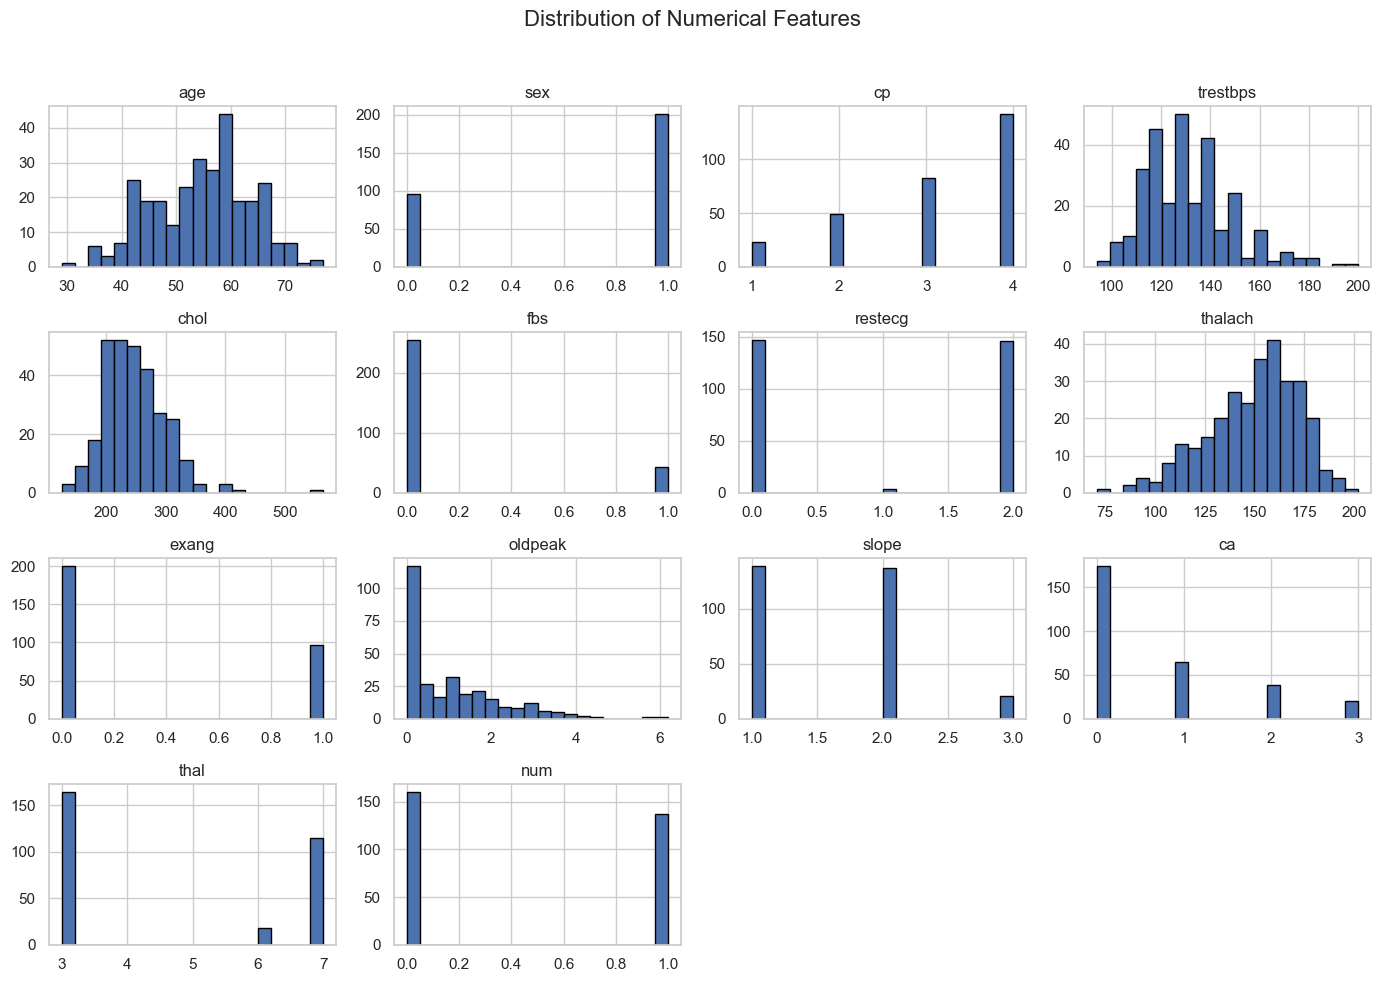

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\951074264.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


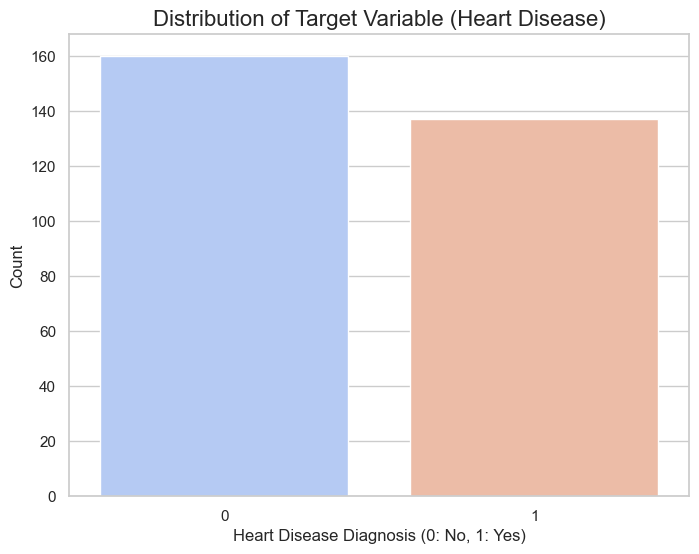

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\951074264.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_cleavland['age'], palette='coolwarm')


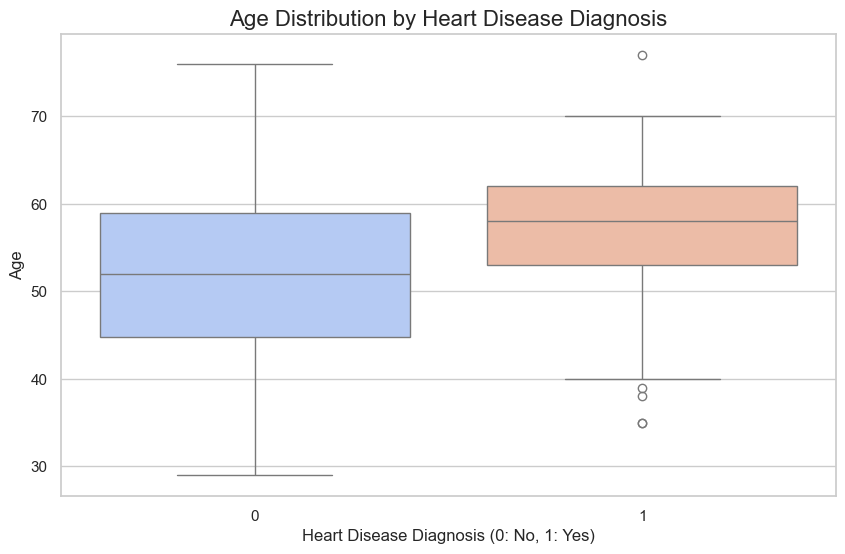

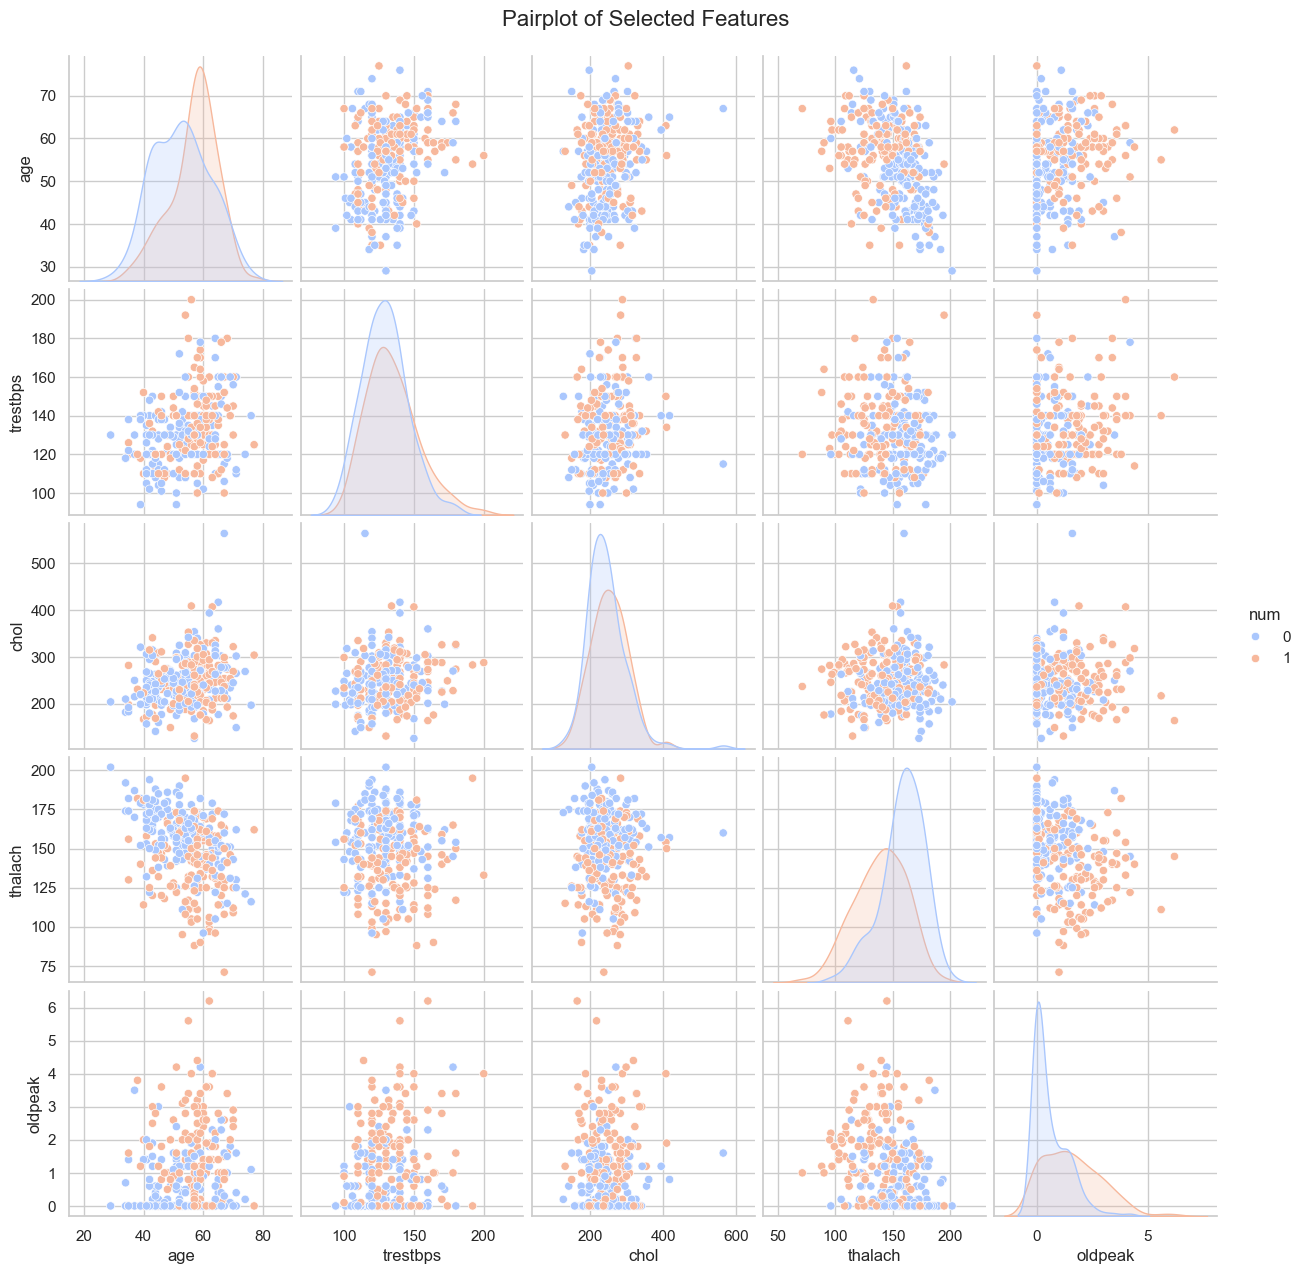

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\951074264.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlation_with_target.index, x=correlation_with_target.values, palette='coolwarm')


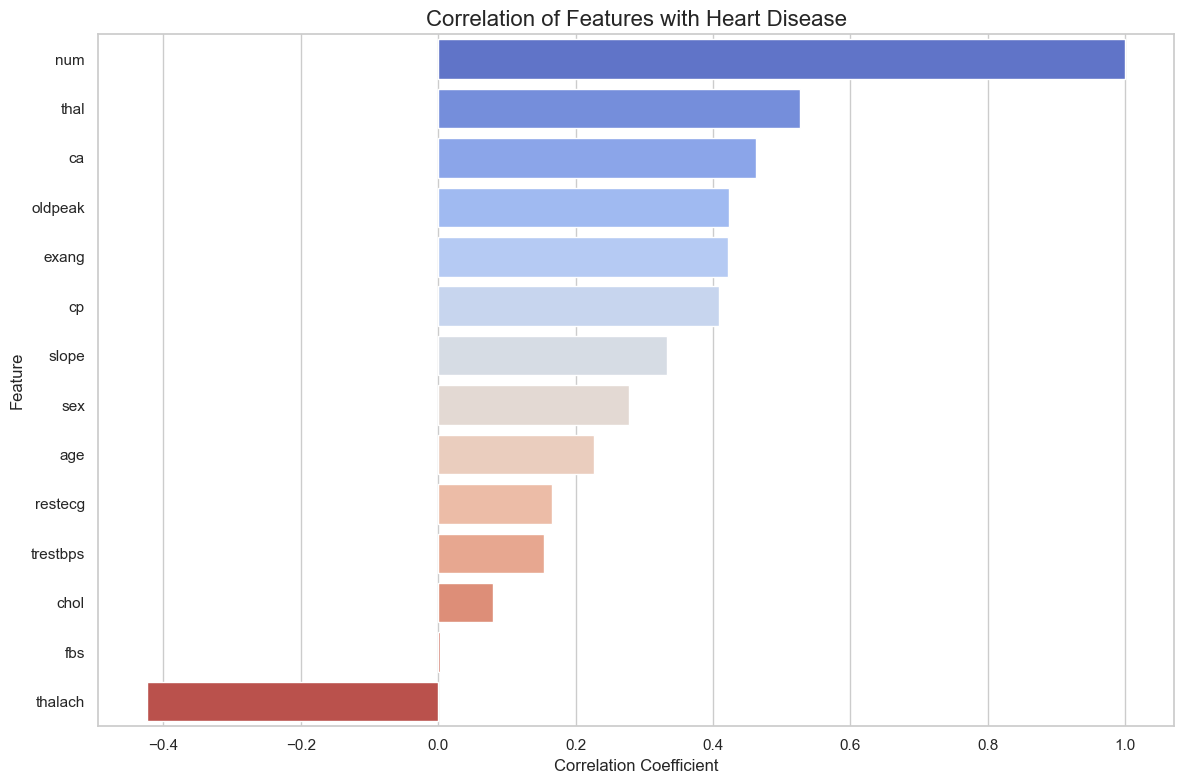

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\951074264.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_cleavland['thalach'], palette='coolwarm')


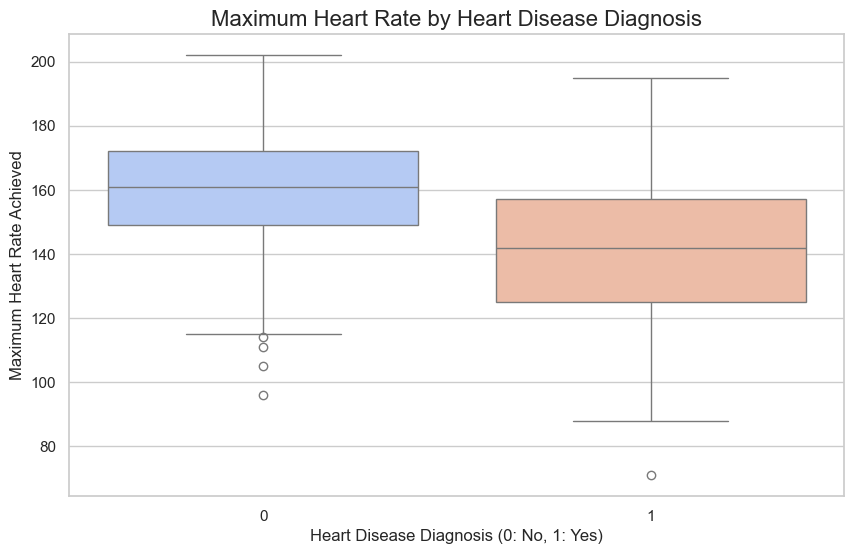

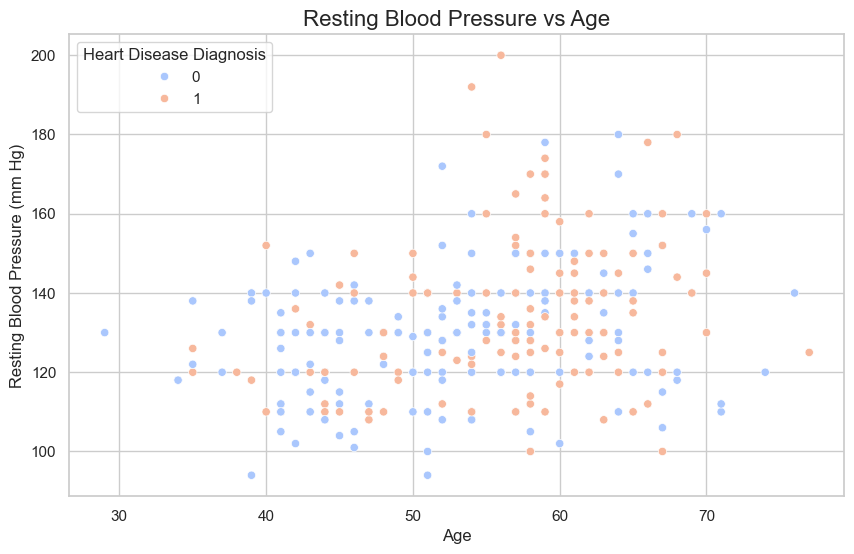

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\951074264.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=df_cleavland['oldpeak'], palette='coolwarm', inner='quartile')


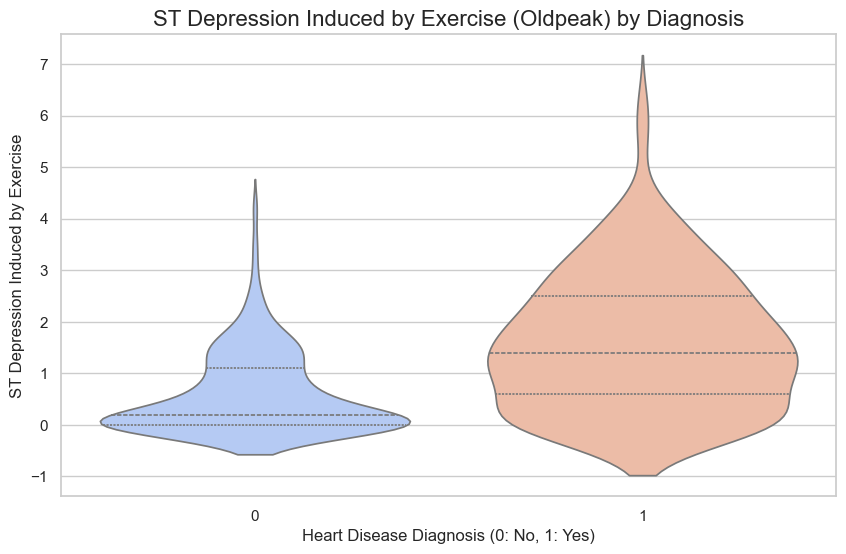

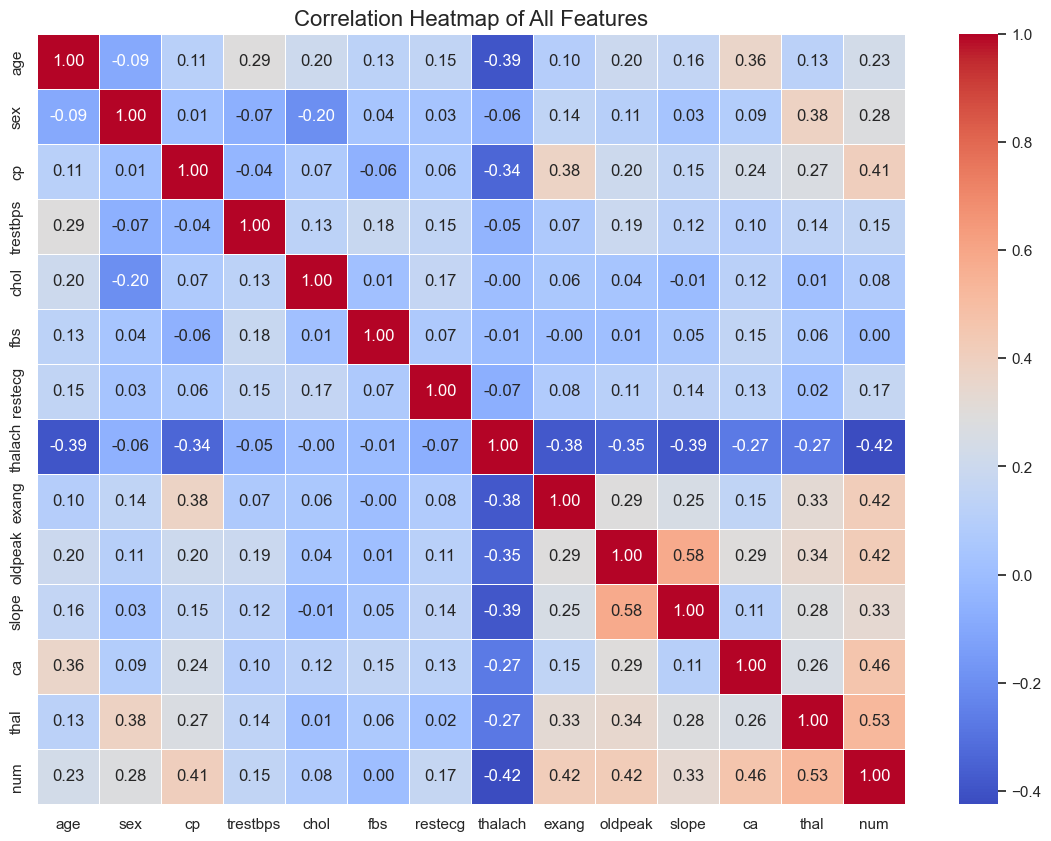

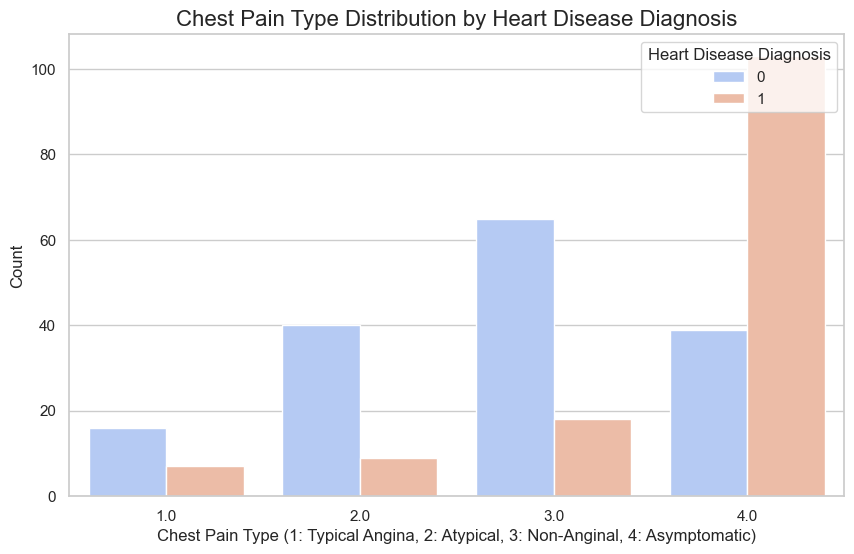

In [ ]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set(style="whitegrid")

# 1. Distribution of Numerical Features
plt.figure(figsize=(14, 10))
df_cleavland.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Countplot of Target Variable (y)
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='coolwarm')
plt.title('Distribution of Target Variable (Heart Disease)', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. Age vs. Target Variable (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_cleavland['age'], palette='coolwarm')
plt.title('Age Distribution by Heart Disease Diagnosis', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

# 4. Pairplot of Selected Features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_df = df_cleavland[selected_features].copy()
selected_df['num'] = y
sns.pairplot(selected_df, hue='num', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', fontsize=16, y=1.02)
plt.show()

# 5. Correlation Heatmap of Features with Target (y)
plt.figure(figsize=(12, 8))
correlation_with_target = df_cleavland.corr()['num'].sort_values(ascending=False)
sns.barplot(y=correlation_with_target.index, x=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Heart Disease', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Feature Comparison: Maximum Heart Rate (thalach)
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_cleavland['thalach'], palette='coolwarm')
plt.title('Maximum Heart Rate by Heart Disease Diagnosis', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=12)
plt.show()

# 7. Resting Blood Pressure (trestbps) vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleavland['age'], y=df_cleavland['trestbps'], hue=y, palette='coolwarm')
plt.title('Resting Blood Pressure vs Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.legend(title='Heart Disease Diagnosis', loc='upper left')
plt.show()

# 8. Violin Plot for 'Oldpeak' by Target
plt.figure(figsize=(10, 6))
sns.violinplot(x=y, y=df_cleavland['oldpeak'], palette='coolwarm', inner='quartile')
plt.title('ST Depression Induced by Exercise (Oldpeak) by Diagnosis', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0: No, 1: Yes)', fontsize=12)
plt.ylabel('ST Depression Induced by Exercise', fontsize=12)
plt.show()

# 9. Heatmap of Correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleavland.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

# 10. Categorical Feature Analysis: Chest Pain Type (cp)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_cleavland['cp'], hue=y, palette='coolwarm')
plt.title('Chest Pain Type Distribution by Heart Disease Diagnosis', fontsize=16)
plt.xlabel('Chest Pain Type (1: Typical Angina, 2: Atypical, 3: Non-Anginal, 4: Asymptomatic)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease Diagnosis', loc='upper right')
plt.show()


* Correlation matrix of features

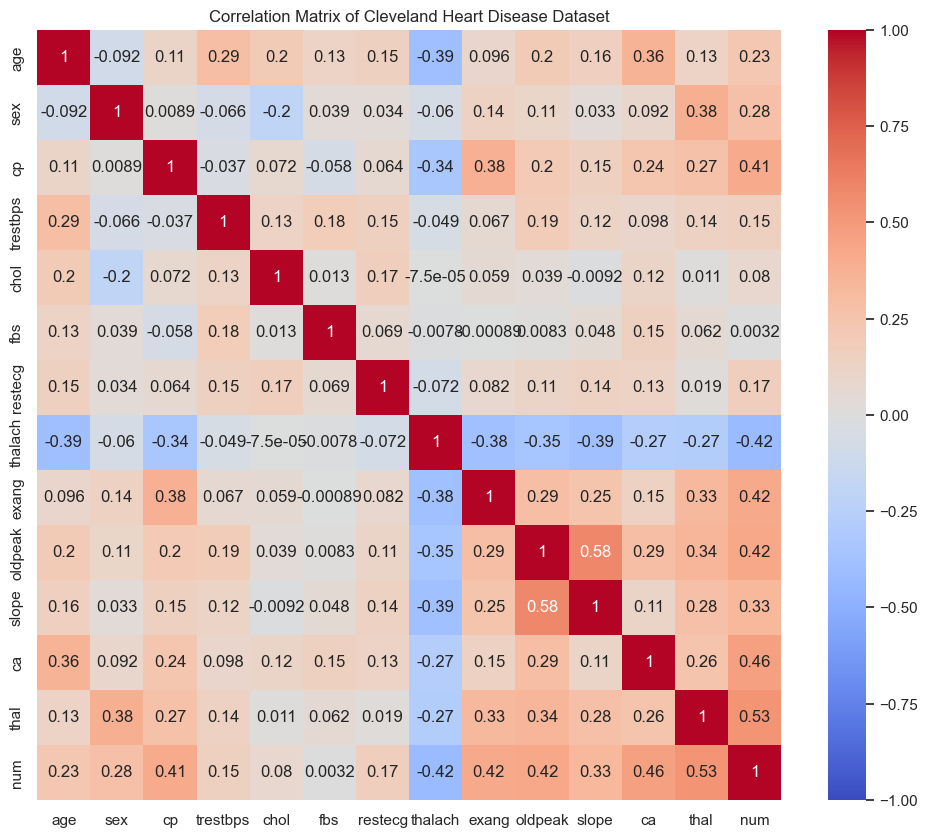

In [ ]:
corr_matrix=df_cleavland.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Cleveland Heart Disease Dataset')
plt.show()

Feature Scoring


Feature Scores:
               Chi2     ANOVA F  Mutual Info  Random Forest  Mean Score
thal      44.569861  113.219319     0.094093       0.125910   39.502296
ca        27.576871   80.577866     0.139140       0.114337   27.102053
exang     35.508090   63.680253     0.040834       0.051467   24.820161
oldpeak   11.059763   64.677208     0.096858       0.099854   18.983421
thalach    2.717718   64.589855     0.071125       0.134981   16.878420
cp         7.117477   59.241915     0.144344       0.125830   16.657391
slope     10.409290   36.804300     0.048966       0.043043   11.826400
sex        7.444195   24.798347     0.013482       0.030644    8.071667
age        1.019542   16.038097     0.012371       0.086605    4.289154
restecg    4.067326    8.394987     0.020906       0.022438    3.126414
trestbps   0.550683    7.117646     0.000000       0.072668    1.935249
chol       0.097053    1.913800     0.091151       0.082908    0.546228
fbs        0.002547    0.002959     0.000000   

C:\Users\sreer\AppData\Local\Temp\ipykernel_29776\381148714.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=scores_df['Mean Score'], palette="viridis")


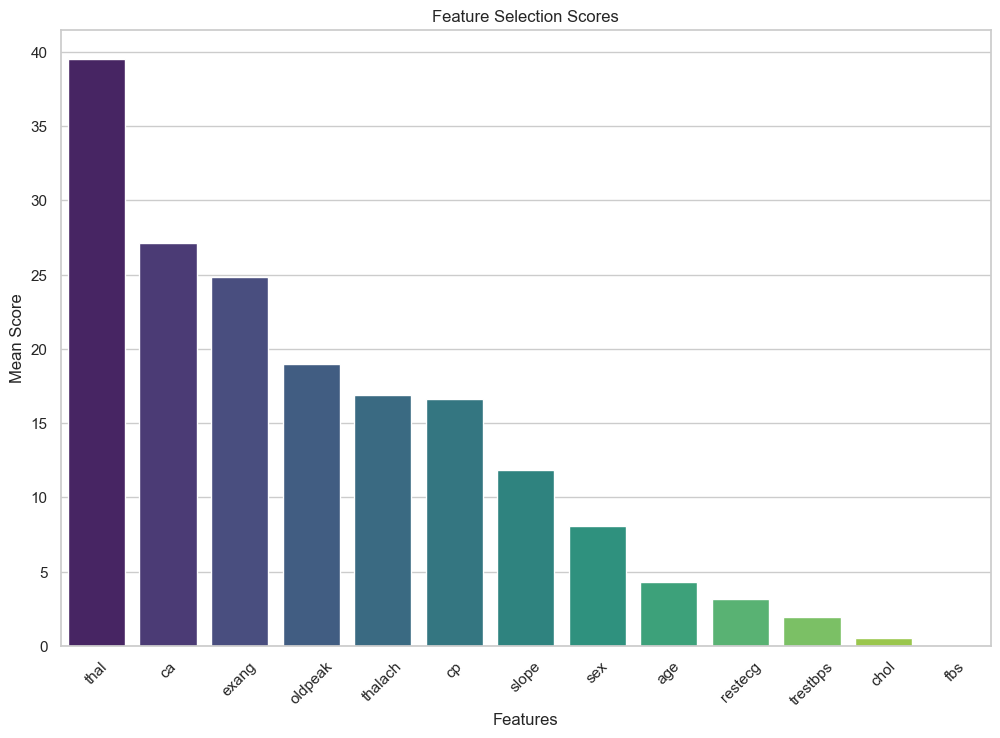

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure X is in DataFrame format with proper column names
X_new = pd.DataFrame(X, columns=df_cleavland.drop("num", axis=1).columns)


# Scale data for chi2 compatibility
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)

# Initialize a dictionary to store scores for each method
feature_scores = {}

# 1. Chi-Square Test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)
feature_scores['Chi2'] = chi2_selector.scores_

# 2. ANOVA F-statistic
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X_new, y)
feature_scores['ANOVA F'] = anova_selector.scores_

# 3. Mutual Information
mutual_info_selector = SelectKBest(mutual_info_classif, k='all')
mutual_info_selector.fit(X_new, y)
feature_scores['Mutual Info'] = mutual_info_selector.scores_

# 4. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_new, y)
feature_scores['Random Forest'] = rf.feature_importances_

# Combine scores into a single DataFrame
scores_df = pd.DataFrame(feature_scores, index=X_new.columns)
scores_df['Mean Score'] = scores_df.mean(axis=1)  # Calculate mean score
scores_df = scores_df.sort_values(by='Mean Score', ascending=False)

# Display feature scores
print("\nFeature Scores:")
print(scores_df)

# Plot feature selection scores
plt.figure(figsize=(12, 8))
sns.barplot(x=scores_df.index, y=scores_df['Mean Score'], palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Selection Scores")
plt.xlabel("Features")
plt.ylabel("Mean Score")
plt.show()


* XGBoost

In [ ]:
#pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.2/124.9 MB 420.1 kB/s eta 0:04:57
   --

In [ ]:
import xgboost as xgb


param = {
    'max_depth':[3, 5, 7,8,10],
    'eta': [0.01, 0.05, 0.1,0.3]  # learning rate
    }



grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'),
                           param_grid=param,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)


print("Best parameters:", grid_search.best_params_)
print("Validation Accuracy: %0.2f" % accuracy)

Best parameters: {'eta': 0.05, 'max_depth': 7}
Validation Accuracy: 0.81


* Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Scale the data
scaler = MinMaxScaler(feature_range=(0, 10))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    n_iter=6,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=0
)


random_search.fit(X_train_scaled, y_train)


best_params = random_search.best_params_
best_model_log = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

y_val_pred = best_model_log.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Validation Accuracy: 0.81


c:\Users\sreer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* Random Forest

In [ ]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9)
}

randmforest = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=randmforest,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train,y_train)
best_model_rnf=random_search.best_estimator_
print(f'Best param:{random_search.best_params_}')

y_pred_rnn=best_model_rnf.predict(X_val)
accuracy_score_rnf=accuracy_score(y_val,y_pred_rnn)
print(f'Accuracy score:{accuracy_score_rnf}')

Best param:{'max_depth': 17, 'max_features': 0.36607031725394257, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 895}
Accuracy score:0.8333333333333334


* ANN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train)
X_val_ann = scaler.transform(X_val)
X_test_ann = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train_ann, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add dimension
X_val_tensor = torch.tensor(X_val_ann, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_ann, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
class HeartDiseaseNN(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.network(x)


# Instantiate the model
input_size = X_train_ann.shape[1]  # Number of features
model = HeartDiseaseNN(input_size)
# Loss function: Binary Cross-Entropy Loss
criterion = nn.BCELoss()

# Optimizer: Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation performance
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            val_preds = (val_outputs >= 0.5).float()  # Threshold for binary classification
            val_accuracy = accuracy_score(y_val, val_preds.numpy())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy:.4f}")



Epoch [10/100], Loss: 0.6871, Validation Loss: 0.6840, Validation Accuracy: 0.4583
Epoch [20/100], Loss: 0.6610, Validation Loss: 0.6559, Validation Accuracy: 0.6667
Epoch [30/100], Loss: 0.6170, Validation Loss: 0.6080, Validation Accuracy: 0.8750
Epoch [40/100], Loss: 0.5491, Validation Loss: 0.5339, Validation Accuracy: 0.9167
Epoch [50/100], Loss: 0.4600, Validation Loss: 0.4357, Validation Accuracy: 0.8958
Epoch [60/100], Loss: 0.3840, Validation Loss: 0.3531, Validation Accuracy: 0.8542
Epoch [70/100], Loss: 0.3467, Validation Loss: 0.3275, Validation Accuracy: 0.8542
Epoch [80/100], Loss: 0.3213, Validation Loss: 0.3406, Validation Accuracy: 0.8542
Epoch [90/100], Loss: 0.2941, Validation Loss: 0.3444, Validation Accuracy: 0.8542
Epoch [100/100], Loss: 0.2664, Validation Loss: 0.3363, Validation Accuracy: 0.8542


### Random Forest and ANN give the highest accuracy on validation set

In [ ]:
#Random Forest Test

y_test_rnf=best_model_rnf.predict(X_test)
accuracy_score_test=accuracy_score(y_test,y_test_rnf)
print(f'Test accuracy: {accuracy_score_rnf:.2%}')

Test accuracy: 83.33%


In [ ]:
#Logistic Regression
y_test_log=best_model_log.predict(X_test_scaled)
accuracy_score_test_log=accuracy_score(y_test,y_test_log)
print(f'{accuracy_score_test_log}')

0.85


In [ ]:
#XGBoost
y_test_xgb=best_model_xgb.predict(X_test)
accuracy_score_test_xgb=accuracy_score(y_test,y_test_xgb)
print(f'Test accuracy:{accuracy_score_test_xgb:.2%}')
#print(y_test[0])
#print(y_test_xgb[0])

Test accuracy:88.33%


In [ ]:
#ANN
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs >= 0.5).float()  # Threshold for binary classification
    test_accuracy_ann = accuracy_score(y_test, test_preds.numpy())
    print(f"\nTest Accuracy: {test_accuracy_ann * 100:.2f}%")


Test Accuracy: 86.67%


### Evaluating metrics for XGBoost since it has highest accuracy:

True predictions: 53
False predictions: 7


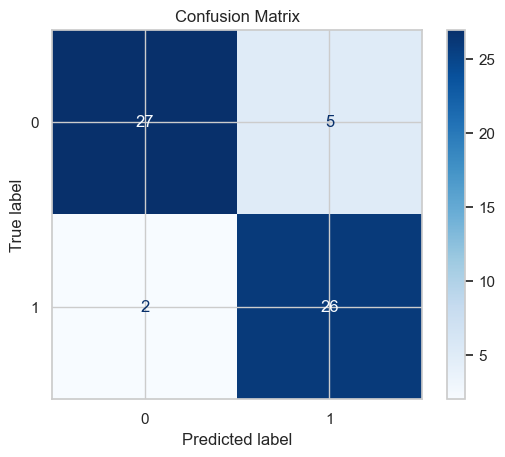

In [ ]:
#Confusion metrics and scores for XGBoost

cm = confusion_matrix(y_test, y_test_xgb)

true_predictions = np.sum(np.diag(cm))
false_predictions = np.sum(cm) - true_predictions
class_names = best_model_xgb.classes_.tolist()
print("True predictions:", true_predictions)
print("False predictions:", false_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scores
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score
mcc = matthews_corrcoef(y_test, y_test_xgb)
f1 = f1_score(y_test, y_test_xgb, average='weighted')
precision = precision_score(y_test, y_test_xgb, average='weighted')

# Display results
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision Score: {precision:.4f}")

Matthews Correlation Coefficient (MCC): 0.7710
F1 Score: 0.8834
Precision Score: 0.8879


### LIME for Model Explanation



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train_scaled_lm = scaler.fit_transform(X_train)
X_test_scaled_lm = scaler.transform(X_test)
feature_names=["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak","slope","ca","thal"]
#  LIME Tabular Explainer
explainer = LimeTabularExplainer(
    X_train_scaled_lm,
    training_labels=y_train,
    feature_names=feature_names,
    class_names=["No Heart Disease", "Heart Disease"],
    mode="classification",
    discretize_continuous=True
)


def model_predict(x):
    # Check if x is already 2D
    if x.ndim == 1:
        x = x.reshape(1, -1)

    if x.shape[1] != 13:
        raise ValueError(f"Expected 13 features, but got {x.shape[1]}")
    return best_model_xgb.predict_proba(x)

# LIME  wrapper
exp = explainer.explain_instance(
    X_test_scaled_lm[0],
    model_predict,
    num_features=13
)
exp.show_in_notebook(show_all=True)